In [5]:

import Pkg; Pkg.add("PyPlot")
import Pkg; Pkg.add("Plots")
include("wikipedia_corpus.jl")
include("kmeans.jl")

using Statistics
using LinearAlgebra
using SparseArrays
using Plots
pyplot()
# scatter!(j_hist,itr,label="points")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


SystemError: SystemError: opening file "/Users/bhanuprasadcherukuvada/personal/uni/classes/mis/julia-journel/assgn2/wikipedia_corpus.jl": No such file or directory

In [2]:
centroids_first, labels_first, j_hist_first = Kmeans.kmeans(article_histograms, 2);
centroids_second, labels_second, j_hist_second = Kmeans.kmeans(article_histograms, 2);

iterations_first = []
iterations_second = []

for i in 1:length(j_hist_first)
    push!(iterations_first, i)
end

for i in 1:length(j_hist_second)
    push!(iterations_second, i)
end

plot(iterations_first, j_hist_first, label="First Run", title="K-Means with 2 Centroids")
plot!(iterations_second, j_hist_second, label="Second Run")


UndefVarError: UndefVarError: `Kmeans` not defined

In [4]:
#4.2 a
centroids_run1, labels_run1, j_hist_run1 = Kmeans.kmeans(article_histograms, 5);
centroids_run2, labels_run2, j_hist_run2 = Kmeans.kmeans(article_histograms, 5);

iterations_run1 = []
iterations_run2 = []

for i in 1:length(j_hist_run1)
    push!(iterations_run1, i) 
end

for i in 1:length(j_hist_run2)
    push!(iterations_run2, i) 
end

plot(iterations_run1, j_hist_run1, label="Run 1", title="K-Means with 5 Centroids")
plot!(iterations_run2, j_hist_run2, label="Run 2")


UndefVarError: UndefVarError: `Kmeans` not defined

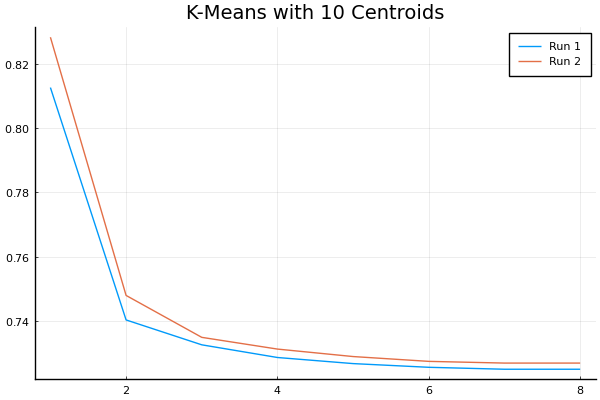

In [11]:
centroids_1, labels_1, j_hist_1 = Kmeans.kmeans(article_histograms, 10);
centroids_2, labels_2, j_hist_2 = Kmeans.kmeans(article_histograms, 10);

iterations_1 = []
iterations_2 = []

for i in 1:length(j_hist_1)
    push!(iterations_1, i) 
end

for i in 1:length(j_hist_2)
    push!(iterations_2, i) 
end

plot(iterations_1, j_hist_1, label="Run 1", title="K-Means with 10 Centroids")
plot!(iterations_2, j_hist_2, label="Run 2")


In [64]:
#A4.2 b
open("Cluster_Data.txt", "w") do file
    for cluster_id in 1:10
        topic_description = "Cluster Number: " * string(cluster_id)
        cluster_titles = article_titles[labels_2 .== cluster_id]
        cluster_words = dictionary[sortperm(centroids_2[cluster_id], rev=true)]
        cluster_info = topic_description * "\nTitles: " * join(cluster_titles, ", ") * "\nCommon Words: " * join(cluster_words, ", ") * "\n\n"
        write(file, cluster_info)
    end
end


In [6]:
#A4.2 c
cluster_centroid_1 = centroids_2[1]
sorted_indices_1 = sortperm(cluster_centroid_1, rev=true)
top_indices_1 = sorted_indices_1[1:5]
top_words_1 = dictionary[top_indices_1]
println("Top 5 words in cluster 1: ", top_words_1)



Top 5 words in cluster 1: ["nations", "international", "council", "general", "assembly"]


In [3]:
#A4.2 d
using LinearAlgebra

distances_to_centroid_1 = [norm(article_histograms[i] - centroids_2[1]) for i in 1:size(article_histograms, 1)]
nearest_indices_1 = sortperm(distances_to_centroid_1)[1:5]
nearest_articles_1 = article_titles[nearest_indices_1]
println("5 articles closest to centroid 1:")
for article in nearest_articles_1
    println(article)
end


UndefVarError: UndefVarError: `article_histograms` not defined

In [9]:
#A4.2 e

function examine_cluster(index, centroids, histograms, vocab, titles)
    centroid_vector = centroids[index]
    ranked_indices = sortperm(centroid_vector, rev=true)
    top_indices = ranked_indices[1:5]
    frequent_words = vocab[top_indices]
    distances_to_centroid = [norm(histograms[i] - centroid_vector) for i in 1:size(histograms, 1)]
    nearest_indices = sortperm(distances_to_centroid)[1:5]
    nearest_titles = titles[nearest_indices]
    return frequent_words, nearest_titles
end

cluster_index = 2
top_words_for_cluster_2, nearest_articles_for_cluster_2 = examine_cluster(cluster_index, centroids_2, article_histograms, dictionary, article_titles)
println("5 most common words in cluster ", cluster_index, ": ", top_words_for_cluster_2)
println("5 articles closest to centroid ", cluster_index, ":")
for title in nearest_articles_for_cluster_2
    println(title)
end


5 most common words in cluster 2: ["painting", "art", "paintings", "artists", "monet"]
5 articles closest to centroid 2:
Impressionism
Gustave Caillebotte
Alfred Sisley
Paul Signac
Salon des Refusés
